In [1]:
# importing required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# loading the data source

df1 = pd.read_csv("/content/student-mat.csv")

df2 = pd.read_csv("/content/student-por.csv")


In [ ]:

df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
# Checking the null values present in the datasets

df1.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df2.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


- No null values present in both datasets. So no imputation required

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
print(df1.columns == df2.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [ ]:
df1.shape, df2.shape

((395, 33), (649, 33))

In [ ]:
df1.duplicated().sum(), df2.duplicated().sum()

(0, 0)

In [ ]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Feature Engineering on Math dataset

In [3]:
x = df1.drop(['G3'], axis = 1)
y = df1['G3']

In [ ]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,12


In [4]:
# extracting numerical columns from the dataset
num_features = x.select_dtypes(exclude = ['object']).columns
num_features


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [ ]:
df1[num_features].corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


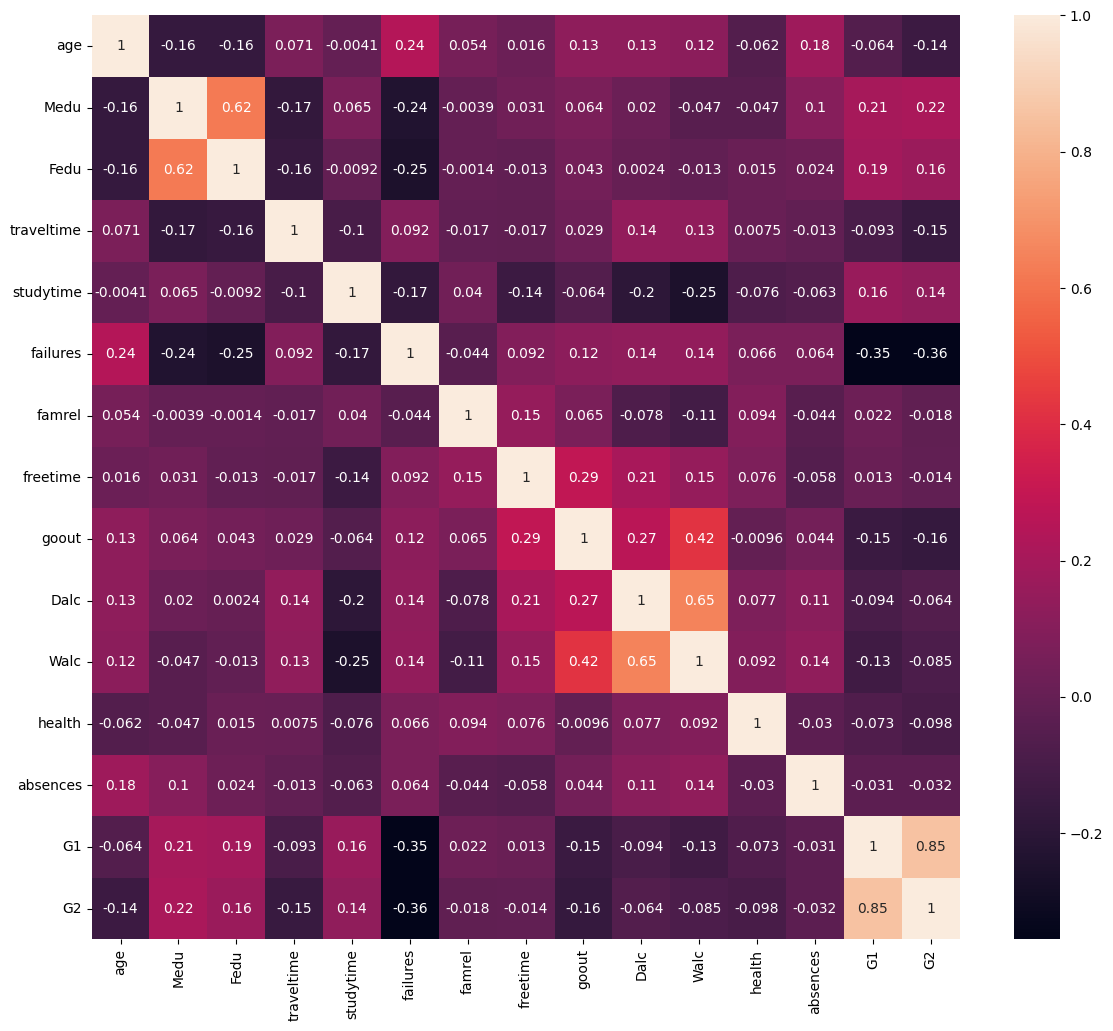

In [185]:
# plotting the correlation map for the numerical columns
plt.figure(figsize = (14, 12))
sns.heatmap(x[num_features].corr(), annot = True)
plt.show()

- The period grades G1 and G2 are highly correlated to the final grade G3,if we want we can drop them. It may be difficult, but the prediction without G1 and G2 is much more useful since we are finding other factors that effects the grade.

#### Positive Impact
- Mother and father with higher education had a positive impact on student performance
- The students who wants to take higher education are having also good grades

#### Negative Impact
- Going out with friends is effecting the student performance very badly
- Age and failures are other features that impact negatively the student performances.

- Lets make some visualisations for these impacts to make conclusions

### Pipeline

- Creating a data pipeline for Imputation, Scaling and Encoding which helps for new data(df2)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import joblib
import pickle

In [ ]:
# extracting numerical columns from the dataset
num_features = x.select_dtypes(exclude = ['object']).columns
num_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [187]:
# extracting categorical features from the dataset
cat_features = x.select_dtypes(include = ['object']).columns
cat_features

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                ('cat', OneHotEncoder(drop='first'),
                                 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])

In [15]:
# Pass the raw data through pipeline
processed1= preprocessor.fit(x)

# ## Save the Imputation and Encoding pipeline
# import joblib
joblib.dump(processed1, 'processed1')


['processed1']

In [186]:
# File gets saved under current working directory
import os
os.getcwd()


'/content'

## Visualisations

Text(0.5, 1.0, 'Mother Education vs Final Grade(G3)')

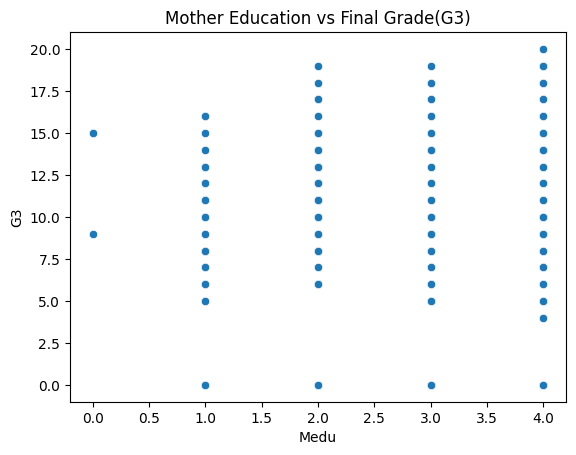

In [ ]:
# p_ed = df1['Fedu'] + df1['Medu']
# Plotting scatter plot to know the relation between Mother education and Final grade G3
a = sns.scatterplot(x = df1['Medu'], y = df1['G3'])
a.axes.set_title('Mother Education vs Final Grade(G3)')

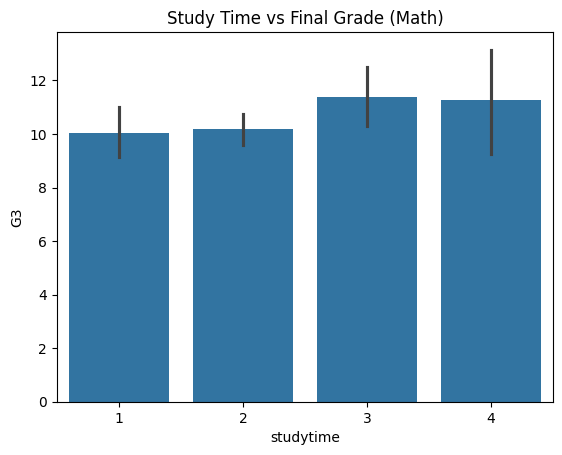

In [ ]:

sns.barplot(x='studytime', y='G3', data=df1)
plt.title('Study Time vs Final Grade (Math)')
plt.show()

- The students who are spending more time on study has better performance

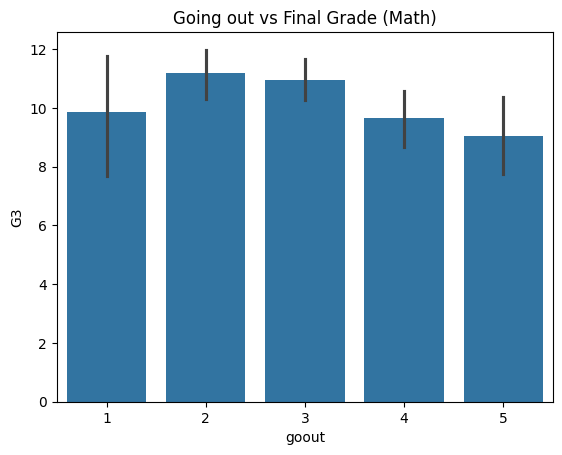

In [ ]:
# Bar plot of grades vs students going out with friends
sns.barplot(x='goout', y='G3', data=df1)
plt.title('Going out vs Final Grade (Math)')
plt.show()

<ipython-input-31-b48c2d93b68d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.boxplot(x=df1['higher'], y=df1['G3'], palette='summer')


Text(0.5, 1.0, 'Higher Education vs Final Grade(G3)')

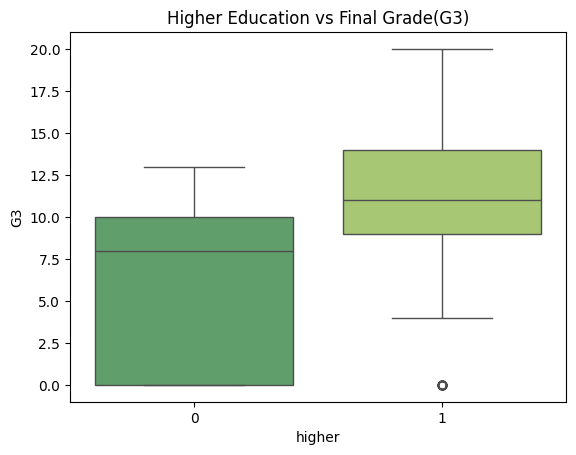

In [ ]:
# Plotting Box-Plot for Grades and Higher education
b = sns.boxplot(x=df1['higher'], y=df1['G3'], palette='summer')
b.axes.set_title('Higher Education vs Final Grade(G3)')

- We can observe the students who wants to take higher education are getting good grades

In [ ]:
# Target Column
Y = df1['G3']
Y

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


In [ ]:
X = df1.drop(['G3'], axis = 1)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,1,0,0,5,5,4,4,5,4,11
391,1,1,17,1,1,1,3,1,3,3,...,1,1,0,2,4,5,3,4,2,3
392,1,1,21,0,0,1,1,1,2,2,...,1,0,0,5,5,3,3,3,3,3
393,1,1,18,0,1,1,3,2,3,2,...,1,1,0,4,4,1,3,4,5,0


In [ ]:
numeric_col = X.select_dtypes(exclude = ['object']).columns
numeric_col

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

### Scaling

### Using MinMaxScaler() for numeric columns

In [ ]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.080000
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.50,0.053333
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.50,0.133333
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.00,0.026667
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.00,0.053333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,0.714286,1.0,1.0,0.0,0.50,0.50,0.75,0.75,...,1.0,0.0,0.0,1.00,1.00,0.75,0.75,1.00,0.75,0.146667
391,1.0,1.0,0.285714,1.0,1.0,1.0,0.75,0.25,0.75,0.75,...,1.0,1.0,0.0,0.25,0.75,1.00,0.50,0.75,0.25,0.040000
392,1.0,1.0,0.857143,0.0,0.0,1.0,0.25,0.25,0.50,0.50,...,1.0,0.0,0.0,1.00,1.00,0.50,0.50,0.50,0.50,0.040000
393,1.0,1.0,0.428571,0.0,1.0,1.0,0.75,0.50,0.75,0.50,...,1.0,1.0,0.0,0.75,0.75,0.00,0.50,0.75,1.00,0.000000


In [ ]:
# checking the min value and max value ranges of every column after minmax scaling
X.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,0.242315,0.777215,0.288608,0.896203,0.687342,0.63038,0.542405,0.570253,...,0.949367,0.832911,0.334177,0.736076,0.558861,0.527215,0.120253,0.322785,0.638608,0.076118
std,0.321177,0.499926,0.182292,0.416643,0.453690,0.305384,0.273684,0.27205,0.306868,0.215885,...,0.219525,0.373528,0.472300,0.224165,0.249716,0.278320,0.222685,0.321974,0.347576,0.106708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.142857,1.000000,0.000000,1.000000,0.500000,0.50000,0.500000,0.500000,...,1.000000,1.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.500000,0.000000
50%,0.000000,0.000000,0.285714,1.000000,0.000000,1.000000,0.750000,0.50000,0.500000,0.500000,...,1.000000,1.000000,0.000000,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.053333
75%,0.000000,1.000000,0.428571,1.000000,1.000000,1.000000,1.000000,0.75000,0.750000,0.750000,...,1.000000,1.000000,1.000000,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,0.106667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Clustering Algorithms

### KMeans clustering

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

In [30]:
x1 = pd.DataFrame(processed1.transform(x), columns = processed1.get_feature_names_out())
x1

clu_data = pd.concat([x1, y], axis = 1)
clu_data

,num__age,num__Medu,num__Fedu,num__traveltime,num__studytime,num__failures,num__famrel,num__freetime,num__goout,num__Dalc,...,cat__guardian_other,cat__schoolsup_yes,cat__famsup_yes,cat__paid_yes,cat__activities_yes,cat__nursery_yes,cat__higher_yes,cat__internet_yes,cat__romantic_yes,G3
0,0.428571,1.00,1.00,0.333333,0.333333,0.000000,0.75,0.50,0.75,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6
1,0.285714,0.25,0.25,0.000000,0.333333,0.000000,1.00,0.50,0.50,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,6
2,0.000000,0.25,0.25,0.000000,0.333333,1.000000,0.75,0.50,0.25,0.25,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,10
3,0.000000,1.00,0.50,0.000000,0.666667,0.000000,0.50,0.25,0.25,0.00,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15
4,0.142857,0.75,0.75,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.714286,0.50,0.50,0.000000,0.333333,0.666667,1.00,1.00,0.75,0.75,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,9
391,0.285714,0.75,0.25,0.333333,0.000000,0.000000,0.25,0.75,1.00,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,16
392,0.857143,0.25,0.25,0.000000,0.000000,1.000000,1.00,1.00,0.50,0.50,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
393,0.428571,0.75,0.50,0.666667,0.000000,0.000000,0.75,0.75,0.00,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10


In [22]:
#warnings.filterwarnings('ignore')
TWSS = []
k = list(range(2, 25))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(clu_data)
    TWSS.append(kmeans.inertia_)
TWSS

[5263.610294649866,
 3169.296784535058,
 2575.9904287783475,
 2324.8148642820856,
 2192.536458999929,
 2079.060968936632,
 2039.3887134856911,
 2004.0220794274585,
 1976.2133304722072,
 1951.9689480636337,
 1925.3355530063463,
 1899.943236221579,
 1880.8918744578364,
 1864.2022386903918,
 1851.2802557628818,
 1815.2830330098257,
 1810.0595519982205,
 1794.126872990511,
 1774.4724385311717,
 1764.6510915976783,
 1745.233305581646,
 1736.8005235632213,
 1719.2676200447436]

Text(0, 0.5, 'total_within_SS')

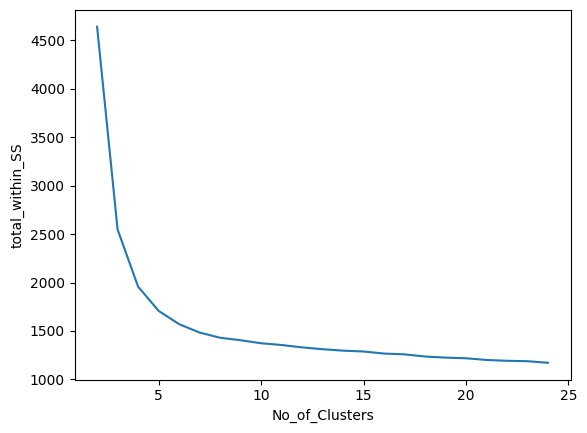

In [ ]:
plt.plot(k, TWSS); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")


In [ ]:
# ## Using KneeLocator
List = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters = k, max_iter = 30, n_init = 10)
    kmeans.fit(clu_data)
    List.append(kmeans.inertia_)

List

[4620.487731222692,
 2536.7015348243617,
 1948.086790355168,
 1700.3523159289302,
 1563.3848473703104,
 1463.1176453515159,
 1422.4707503732104,
 1397.267457867351,
 1367.27765489006,
 1338.8912734233838]

In [23]:
!pip install kneed

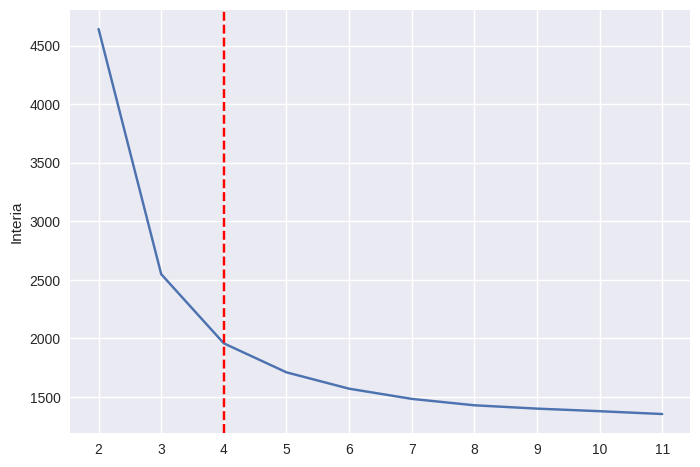

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 12), List, curve = 'convex', direction='decreasing', interp_method='interp1d')
# kl = KneeLocator(range(2, 9), List, curve='convex', direction = 'decreasing')
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 12), List)
plt.xticks(range(2, 12))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

- From the Kneed locator we can observe clusters = 4 is a good choice


- We can check the silhouette score for different clusters to conclude


In [ ]:
silhouette_coefficients = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(clu_data)
    score = metrics.silhouette_score(clu_data, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

silhouette_coefficients

[[2, 0.5125332633036265],
 [3, 0.412427503050212],
 [4, 0.32205635968631463],
 [5, 0.2630092925646815],
 [6, 0.23886008522635485],
 [7, 0.20781673314250662],
 [8, 0.17291838684091773],
 [9, 0.16700222095564515],
 [10, 0.150855921578602],
 [11, 0.1614143605045215]]

In [ ]:
# Building KMeans clustering
model1 = KMeans(n_clusters = 3)
kmeans_model = model1.fit(clu_data)

# Cluster labels
model1.labels_


array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2,
       1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1,
       2, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1,

In [ ]:
# from sklearn import metrics
metrics.silhouette_score(clu_data, model1.labels_)

0.412427503050212

### Hierarchical Clustering - Agglomerative Clustering

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt

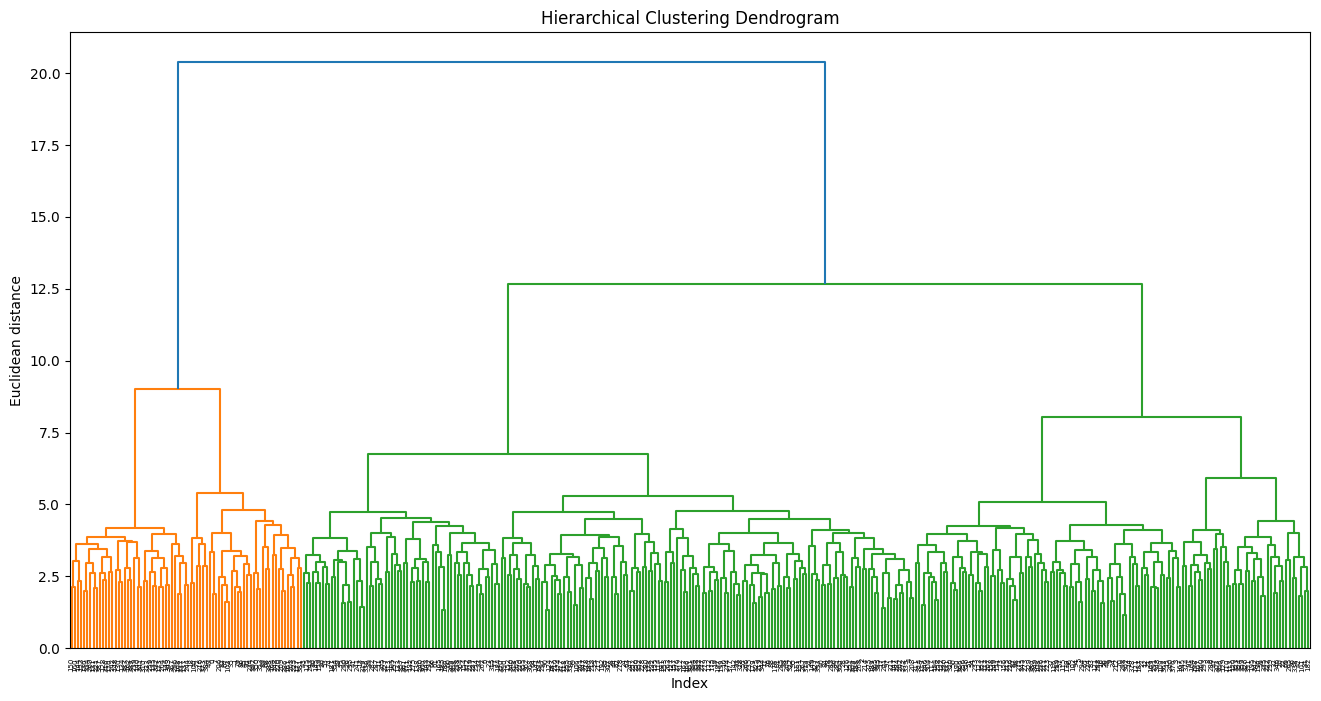

In [31]:

plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(clu_data, method = "complete"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distance')
plt.show()

In [32]:
hclu = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

y_hclu = hclu.fit_predict(clu_data)
y_hclu

array([0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1,
       2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0,
       2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2,
       0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2,

In [ ]:
hclu.labels_

array([0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1,
       1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1,
       2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0,
       2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2,
       0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 2,
       0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2,

In [33]:
# Analyzing the Results obtained
hclu.labels_   # Referring to the cluster labels assigned

cluster_labels = pd.Series(hclu.labels_)


In [ ]:
# Combine the labels obtained with the data
df_clust = pd.concat([cluster_labels, clu_data], axis = 1)

df_clust.head()

df_clust.columns
df_clust = df_clust.rename(columns = {0: 'cluster'})
df_clust.head()

,cluster,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,...,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,6
1,0,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,...,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,6
2,2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,...,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,10
3,1,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,...,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,15
4,2,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,...,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,10


In [ ]:
metrics.silhouette_score(clu_data, cluster_labels)

0.3302810999941873

#### Evaluating the Two clustering models with silhouette scores




In [ ]:
# Create a dictionary to store the silhouette scores
silhouette_scores = {
    'Model': ['KMeans', 'Hierarchical'],
    'Silhouette Score': [
        metrics.silhouette_score(clu_data, model1.labels_),
        metrics.silhouette_score(clu_data, cluster_labels)
    ]
}

silhouette_df = pd.DataFrame(silhouette_scores)
silhouette_df

,Model,Silhouette Score
0,KMeans,0.412386
1,Hierarchical,0.330281


### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Define PCA model
pca = PCA(n_components = 30 )
pca_data = pca.fit_transform(X)


In [ ]:
pca_data1 = pd.DataFrame(pca.fit_transform(X))
pca_data1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.287640,0.917748,-0.068958,-0.281033,-0.899326,0.006172,-0.308812,-0.374708,-0.355721,-0.496678,...,0.503250,0.121344,0.110365,0.321669,0.182464,0.023849,-0.101643,0.197007,-0.291414,-0.068446
1,-0.017513,0.922429,0.006310,-0.652039,-0.327737,-0.523220,0.156201,0.764206,0.170821,0.271894,...,0.071290,0.023926,-0.130942,-0.243196,0.030611,-0.015142,-0.100112,0.169507,-0.081252,0.015975
2,-0.066061,0.624978,0.537375,0.204481,-0.489464,0.857276,0.307896,0.418015,0.153635,-0.775952,...,0.140330,-0.371461,-0.226856,0.170906,0.013048,-0.623008,-0.118461,-0.165332,0.122818,0.085698
3,-1.020297,0.002947,-0.447781,0.456599,0.189387,-0.362127,0.036312,0.021086,-0.542171,0.026441,...,0.022867,-0.016662,0.040180,0.172924,0.191508,0.012751,-0.418602,-0.054126,0.107869,-0.033892
4,-0.669589,0.434240,0.377601,-0.601358,-0.155087,0.069708,-0.263543,-0.166204,-0.474638,-0.201489,...,-0.015492,-0.157595,-0.084137,-0.000894,-0.129607,-0.015479,-0.000824,-0.040654,-0.051352,0.037422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.455820,-0.170650,1.416800,-0.016762,0.504014,0.593336,-0.579873,0.364292,-0.231670,-0.326382,...,0.155550,-0.125234,-0.594718,-0.022160,0.172468,-0.244041,0.040178,0.020131,0.000285,0.051801
391,1.349445,0.020532,0.858864,0.062811,-0.005727,0.252072,0.488908,0.614865,0.315136,0.472827,...,-0.286007,0.110617,0.364614,0.059920,0.258537,0.122660,-0.290251,0.019577,0.058756,0.002487
392,1.641033,0.830196,0.224685,-0.713948,0.926930,0.175604,0.211621,0.098018,0.015935,0.171450,...,-0.110933,-0.348010,-0.385439,-0.171274,-0.003534,-0.464618,0.004448,0.148957,-0.066136,-0.037714
393,1.499935,0.176090,0.612093,-0.191556,0.567580,0.471501,-0.062544,0.273829,0.054412,1.030532,...,-0.333617,0.224571,-0.184657,0.288366,-0.271383,-0.008223,-0.116039,-0.054935,-0.104370,-0.102250


In [ ]:
#PCA weights
pca.components_

array([[ 1.20657564e-01,  4.31616644e-01,  5.51038975e-02,
        -1.25972390e-01,  1.35173626e-01, -3.77715650e-03,
        -1.37765223e-01, -1.12412604e-01, -4.21841834e-02,
         1.67098511e-02, -1.97773484e-01, -4.73842633e-03,
         7.23373745e-02, -1.82642461e-01,  1.05740687e-01,
        -8.25199901e-02, -5.11338471e-01, -5.18690503e-01,
        -2.45197004e-02, -1.37714973e-01, -1.00616570e-01,
        -1.46440353e-01, -6.37837419e-02,  6.73904936e-03,
         7.08014366e-02,  4.48462707e-02,  8.31611321e-02,
         1.50712016e-01,  9.22372027e-02, -9.09137113e-03,
        -1.98979187e-02, -3.41794174e-02],
       [ 1.44686613e-01, -5.83675105e-01,  7.67335563e-02,
        -1.48438715e-01, -1.33702752e-01, -1.44489877e-02,
        -2.22748939e-01, -1.75316568e-01, -2.59690794e-01,
        -5.18000254e-02, -7.05075718e-02,  6.57813160e-02,
         5.03366774e-02,  5.57493795e-02,  8.51018005e-02,
         4.10837866e-02, -9.24667395e-02, -1.73944241e-01,
        -4.76

In [ ]:
components = pd.DataFrame(pca.components_,  columns = X.columns).T
components

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
school,0.118996,0.147335,0.062494,0.035511,0.241665,0.165006,0.025827,-0.072348,-0.107301,0.267151,...,-0.002205,-0.061308,-0.035022,-0.081448,0.038805,0.034042,-0.080732,-0.155007,0.143369,0.077314
sex,0.439136,-0.583878,0.217893,-0.122501,0.151601,-0.129950,-0.050570,-0.196776,0.105797,0.064671,...,0.050327,-0.018021,0.074067,-0.051100,0.042086,-0.040462,0.020686,0.002635,-0.019674,0.025340
age,0.053710,0.075674,0.028147,0.062253,0.116857,0.028255,0.047393,-0.007778,0.009933,0.016002,...,0.126538,-0.066228,-0.146270,-0.104377,-0.078373,0.117210,0.168658,0.425562,-0.737060,-0.228929
address,-0.122476,-0.138648,0.177527,0.167247,-0.545579,-0.303719,0.270415,0.258347,-0.012039,-0.221957,...,0.053928,0.127319,-0.007863,0.098674,-0.089215,-0.020052,0.036470,-0.013869,-0.005290,0.018075
famsize,0.138762,-0.118552,0.269611,0.475350,-0.194232,0.515807,-0.325293,0.391933,0.116727,0.195832,...,0.058680,-0.050325,-0.000258,0.019540,0.045884,-0.016205,-0.023583,-0.003896,-0.003411,-0.002930
Pstatus,-0.004273,-0.019494,-0.083033,-0.109115,0.108910,-0.038685,0.156101,0.069522,-0.068832,0.003500,...,-0.080635,0.027717,0.015326,0.014844,-0.052997,-0.036327,-0.026587,0.004168,0.018551,0.038657
Medu,-0.133816,-0.219841,0.026774,0.050321,-0.072014,-0.089418,-0.024419,-0.217035,0.016570,0.190144,...,0.044963,-0.107516,0.113246,0.167013,-0.270667,-0.010072,-0.677551,-0.094957,-0.194563,-0.076910
Fedu,-0.109331,-0.173449,-0.005066,0.010552,-0.057768,-0.091156,-0.081362,-0.173629,-0.027589,0.149826,...,0.172248,-0.178435,-0.063598,0.146900,-0.078425,-0.113243,0.593956,0.049629,0.130997,0.039531
Mjob,-0.038562,-0.259394,0.070925,0.027692,-0.081815,-0.044765,0.009903,-0.126505,-0.015042,0.308259,...,-0.141983,0.077353,0.078433,-0.227491,-0.088770,0.101058,0.236643,-0.019704,0.062509,0.001273
Fjob,0.017633,-0.050947,-0.004904,-0.019109,0.008947,-0.055466,0.026663,-0.065839,0.000170,0.076707,...,0.454762,0.238070,-0.211842,0.195360,0.710412,-0.055923,-0.128910,-0.000016,-0.070499,-0.005637


In [ ]:
pca.explained_variance_ratio_

# cummulative sum of variance of the components
var = np.cumsum(pca.explained_variance_ratio_)
var

array([0.11541673, 0.20522513, 0.28016081, 0.34987564, 0.4158012 ,
       0.47615707, 0.52817788, 0.5759459 , 0.61943407, 0.65626594,
       0.69228524, 0.72517037, 0.75616977, 0.78635681, 0.81266637,
       0.83619278, 0.85673558, 0.87674607, 0.8937049 , 0.90919231,
       0.9232915 , 0.93682512, 0.94854441, 0.95954785, 0.96966189,
       0.97963617, 0.98628053, 0.992247  , 0.99743867, 1.        ])

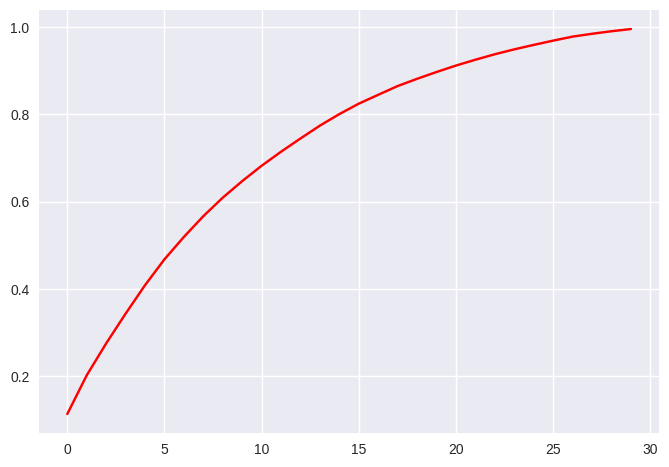

In [ ]:
# Variance plot for PCA components obtained
plt.plot(var, color = "red")

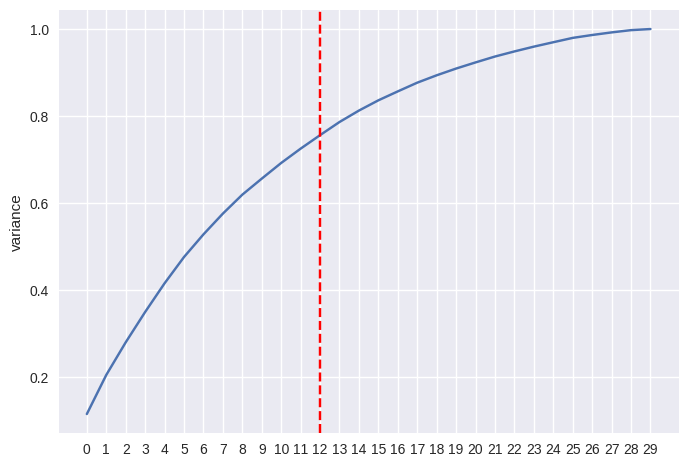

In [ ]:
# from kneed import KneeLocator
kl = KneeLocator(range(len(var)), var, curve = 'concave', direction = "increasing")
kl.elbow

plt.style.use("seaborn")
plt.plot(range(len(var)), var)
plt.xticks(range(len(var)))
plt.ylabel("variance")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()


In [ ]:
final_pca_data = pca_data1.iloc[ :, :16]
final_pca_data.columns = ['pc0','pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']
final_pca_data

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,0.287640,0.917748,-0.068958,-0.281033,-0.899326,0.006172,-0.308812,-0.374708,-0.355721,-0.496678,0.545340,0.583138,0.100541,0.974851,0.033196,-0.051714
1,-0.017513,0.922429,0.006310,-0.652039,-0.327737,-0.523220,0.156201,0.764206,0.170821,0.271894,-0.192025,-0.311634,-0.106710,-0.153515,-0.221963,-0.349075
2,-0.066061,0.624978,0.537375,0.204481,-0.489464,0.857276,0.307896,0.418015,0.153635,-0.775952,-0.184795,-0.459864,0.736450,0.154509,0.280707,0.310866
3,-1.020297,0.002947,-0.447781,0.456599,0.189387,-0.362127,0.036312,0.021086,-0.542171,0.026441,-0.379532,0.043492,0.099819,-0.114501,-0.094212,-0.214735
4,-0.669589,0.434240,0.377601,-0.601358,-0.155087,0.069708,-0.263543,-0.166204,-0.474638,-0.201489,-0.407035,0.576216,-0.052717,-0.105137,-0.499227,0.014766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.455820,-0.170650,1.416800,-0.016762,0.504014,0.593336,-0.579873,0.364292,-0.231670,-0.326382,0.158388,0.725313,-0.773782,0.366309,0.504297,0.619097
391,1.349445,0.020532,0.858864,0.062811,-0.005727,0.252072,0.488908,0.614865,0.315136,0.472827,0.608640,-0.106986,-0.248365,0.154431,-0.357876,0.344923
392,1.641033,0.830196,0.224685,-0.713948,0.926930,0.175604,0.211621,0.098018,0.015935,0.171450,0.039406,0.204510,-0.497232,0.328015,0.468501,0.741566
393,1.499935,0.176090,0.612093,-0.191556,0.567580,0.471501,-0.062544,0.273829,0.054412,1.030532,0.331872,0.017435,0.506685,-0.172759,-0.076938,0.230885


## Regression Models

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
line_pipe = Pipeline(steps=[
                  ('preprocessor', processed1),
                  ('linear', LinearRegression())
                  ])


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

line_pipe.fit(X_train, y_train)
y_pred = line_pipe.predict(X_test)

In [37]:
# Evaluate the model
line_mse = mean_squared_error(y_test, y_pred)
line_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", line_mse)
print("R-squared:", round(line_r2,2))

Mean Squared Error: 5.656642833231208
R-squared: 0.72


In [ ]:
# Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'diff': y_test-y_pred})
comparison_df.head()

,Actual,Predicted,diff
78,10,6.001607,3.998393
371,12,11.528478,0.471522
248,5,2.866437,2.133563
55,10,8.796631,1.203369
390,9,8.553106,0.446894


Text(0, 0.5, 'Predicted Grade')

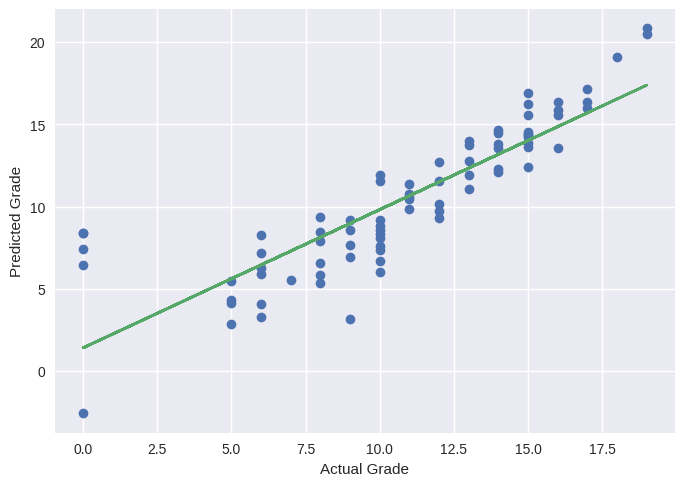

In [ ]:
# plotting Predicted grade vs Acutal grade graph
plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")

### Logistic Regression


In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [158]:
bins = [0, 10, 15, 20]  # Grade intervals
labels = [0, 1, 2]      # 0: Low, 1: Medium, 2: High
Target_bins = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

In [159]:
logis_pipe = Pipeline(steps=[
                  ('preprocessor', processed1),
                  ('logis', LogisticRegression())
               ])


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, Target_bins, test_size=0.2, random_state=42)

logis_pipe.fit(X_train, y_train)
y_pred = logis_pipe.predict(X_test)

In [41]:
log_mse = mean_squared_error(y_test, y_pred)
log_r2 = r2_score(y_test, y_pred)
log_r2

0.6060505319148937

In [160]:
# accuracy - Model evaluation
log_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {log_accuracy * 100:.2f}%")

Accuracy: 81.01%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[34  4  0]
 [ 4 25  2]
 [ 0  5  5]]


In [ ]:
# Classification report for detailed metrics (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.74      0.81      0.77        31
           2       0.71      0.50      0.59        10

    accuracy                           0.81        79
   macro avg       0.78      0.73      0.75        79
weighted avg       0.81      0.81      0.81        79



### Lasso

In [58]:
### LASSO MODEL ###
from sklearn.linear_model import Lasso

lasso_pipe = Pipeline(steps=[
                  ('preprocessor', processed1),
                  ('lasso', Lasso(alpha=0.1))
                  ])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lasso_pipe.fit(X_train, y_train)

y_pred_lasso = lasso_pipe.predict(X_test)

In [ ]:
y_pred_lasso.shape

(79,)

In [90]:
# Coefficient values for all independent variables#
#plt.bar(height = pd.Series(lasso.coef_), x = pd.Series(X.columns))

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_r2


0.7911980213349574

In [47]:
# RMSE
lasso_rmse = np.sqrt(np.mean((y_pred_lasso - np.array(y_test))**2))
lasso_rmse

2.069177237984318

#### GridSearchCV Lasso

In [75]:
from sklearn.model_selection import GridSearchCV

In [91]:
parameters = {'alpha': [1e-10, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.13, 0.2, 1, 5, 10, 20]}

lasso = Lasso()

lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)
lasso_reg.fit(x1, y)

lasso_reg.best_params_
lasso_reg.best_score_

lasso_pred = lasso_reg.predict(x1)


In [92]:
# Adjusted r-square#
grid_lasso = lasso_reg.score(x1, y)
grid_lasso

# RMSE
grid_lasso_rmse = np.sqrt(np.mean((lasso_pred - np.array(y)) ** 2))
grid_lasso_rmse

1.8151422892019833

### Ridge Regression

In [64]:
### RIDGE REGRESSION ###
from sklearn.linear_model import Ridge

rm = Ridge(alpha = 0.1)

x1 = pd.DataFrame(processed1.transform(x), columns = processed1.get_feature_names_out())
rm.fit(x1, y)

Ridge(alpha=0.1)

In [ ]:
# Coefficients values for all the independent vairbales
rm.intercept_
rm.coef_

array([ 0.67524359,  1.16329488, -2.2361738 ,  0.69654908,  0.73651004,
       -0.51789135,  1.97515216,  0.12543558, -0.78579258,  0.82284747,
        0.98027108,  0.15973371, -0.8107286 ,  1.54461193, -4.64177942,
       -1.18051235, -0.76737378,  0.28917448, -0.38152756, -0.17104961,
        1.44128234,  0.51433048, -1.05510326,  0.74747015,  1.28815409,
       -2.29954082, -0.85628864,  0.67708512, -0.37821309,  3.61338882])

In [65]:
rm.alpha
pred_rm = rm.predict(x1)

In [68]:
# Adjusted r-square
ridge_r2 = rm.score(x1, y)
ridge_r2

0.8456758543102726

In [70]:
# RMSE
ridge_rmse = np.sqrt(np.mean((pred_rm - np.array(y)) ** 2))
ridge_rmse

1.7974994022066333

#### GridSearchCV Ridge

In [80]:
# Ridge Regression
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge

ridge = Ridge()

# parameters = {'alpha': [1e-10, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.13, 0.2, 1, 5, 10, 20]}

ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)
ridge_reg.fit(x1, y)

ridge_reg.best_params_
ridge_reg.best_score_

ridge_pred = ridge_reg.predict(x1)


In [93]:
# Adjusted r-square#
grid_ridge = ridge_reg.score(x1, y)
grid_ridge

# RMSE
grid_ridge_rmse = np.sqrt(np.mean((ridge_pred - np.array(y)) ** 2))
grid_ridge_rmse

1.798907599869349

In [94]:
scores = pd.DataFrame({
    'Models': ['Lasso', 'Ridge', 'Grid_Lasso', 'Grid_Ridge'],
    'R2 score': [lasso_r2, ridge_r2, grid_lasso, grid_ridge],
    'RMSE': [lasso_rmse, ridge_rmse, grid_lasso_rmse, grid_ridge_rmse]
})

scores.round(2)


,Models,R2 score,RMSE
0,Lasso,0.79,2.07
1,Ridge,0.85,1.80
2,Grid_Lasso,0.84,1.82
3,Grid_Ridge,0.85,1.80


- Ridge and Gridsearch Ridge giving the best output with R-squared value 0.85 and rmse value 1.80

In [ ]:
from sklearn.model_selection import cross_val_score

# cross-validation for logistic regression
scores = cross_val_score(logis_pipe, x, Target_bins, cv=10)

print("Max Accuracy:", round(max(scores)*100,2))

print("Mean Accuracy:", round(np.mean(scores)*100,2))

Max Accuracy: 92.31
Mean Accuracy: 75.68


In [ ]:
# cross-validation for Linear regression
scores = cross_val_score(line_pipe, x, y, cv=10)

print("Max Accuracy:", round(max(scores)*100,2))

print("Mean Accuracy:", round(np.mean(scores)*100,2))

Max Accuracy: 91.04
Mean Accuracy: 78.15


### SVM

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [112]:
# Define the SVM model (for regression we use SVR)
svm_model = SVR(kernel='linear')

In [113]:
# Create a pipeline to preprocess the data and then train the model
svm_pipeline = Pipeline(steps=[
                  ('preprocessor', processed1),
                  ('svm', svm_model)
               ])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)

In [114]:
# Calculate evaluation metrics
svm_mse = mean_squared_error(y_test, y_pred)
svm_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {svm_mse:.2f}")
print(f"R² Score: {svm_r2:.2f}")

Mean Squared Error: 4.84
R² Score: 0.76


### Decision Trees

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
# Intialising decisiontree classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Creating a DT pipeline
DT_pipeline = Pipeline(steps=[
                    ('preprocessor', processed1),
                    ('classifier', dt_classifier)
                    ])

# splitting the data into training and testing (training 80%, testing 20%)
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(x, Target_bins, test_size=0.2, random_state=42)

# Model training
DT_pipeline.fit(dt_X_train, dt_y_train)

# Predicitons
dt_y_pred = DT_pipeline.predict(dt_X_test)

In [116]:
# Calculate accuracy
dt_accuracy = accuracy_score(dt_y_test, dt_y_pred)
print(f"Accuracy: {dt_accuracy * 100:.2f}%")


Accuracy: 87.34%


In [ ]:
print("Classification Report:")
print(classification_report(dt_y_test, dt_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93        38
           1       0.86      0.81      0.83        31
           2       0.88      0.70      0.78        10

    accuracy                           0.87        79
   macro avg       0.87      0.83      0.85        79
weighted avg       0.87      0.87      0.87        79



In [141]:
from sklearn.tree import DecisionTreeRegressor

In [151]:
# Intialising the DecisionTree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Creating a DT Regressor pipeline
dt_pipeline = Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('Regressor', dt_regressor)
                    ])

# splitting the data into training and testing (training 80%, testing 20%)
dtr_X_train, dtr_X_test, dtr_y_train, dtr_y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training
dt_pipeline.fit(dtr_X_train, dtr_y_train)

# making Predictions
dtr_y_pred = dt_pipeline.predict(dtr_X_test)

In [152]:
# Calculate accuracy
dtr_accuracy = accuracy_score(dtr_y_test, dtr_y_pred)
print(f"Accuracy: {dtr_accuracy * 100:.2f}%")


Accuracy: 41.77%


### Random Forest

#### Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
# Intialising the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

# Create a pipeline to preprocess the data and then train the model
RF_pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', rf_classifier)
                ])

In [118]:
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(x, Target_bins, test_size=0.2, random_state=42)

# Train the model
RF_pipeline.fit(rf_X_train, rf_y_train)

# Making predictions
rf_y_pred = RF_pipeline.predict(rf_X_test)

In [119]:
# Calculate accuracy
rf_accuracy = accuracy_score(rf_y_test, rf_y_pred)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")


Accuracy: 91.14%


In [ ]:
print("RF Classification Report:")
print(classification_report(rf_y_test, rf_y_pred))

RF Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.83      0.97      0.90        31
           2       1.00      0.60      0.75        10

    accuracy                           0.91        79
   macro avg       0.94      0.84      0.87        79
weighted avg       0.92      0.91      0.91        79



#### Random Forest Regressor

In [135]:
from sklearn.ensemble import RandomForestRegressor

# Intialising the RandomForest Regressor model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)

# Create a pipeline to preprocess the data and then train the model
rf_pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', rf_regressor)
                ])

# Splitting the data into training and testing (80% training and 20% testing)
rfr_X_train, rfr_X_test, rfr_y_train, rfr_y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training
rf_pipeline.fit(rfr_X_train, rfr_y_train)

# Making the predictions
rfr_y_pred = rf_pipeline.predict(rfr_X_test)

In [136]:
# Model Evaluation
rfr_mse = mean_squared_error(rfr_y_test, rfr_y_pred)
rfr_r2 = r2_score(rfr_y_test, rfr_y_pred)

print(f"Mean Squared Error (MSE): {rfr_mse:.2f}")
print(f"R2 Score: {rfr_r2:.2f}")

Mean Squared Error (MSE): 3.80
R2 Score: 0.81


### XGBoost

In [107]:
from xgboost import XGBRegressor

In [120]:
# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=10)

# Create a pipeline to preprocess the data and then train the model
xgb_pipeline = Pipeline(steps=[
              ('preprocessor', processed1),
              ('regressor', xgb_regressor)
              ])

In [121]:
xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Train the model
xgb_pipeline.fit(xgb_X_train, xgb_y_train)

# Make predictions
y_pred_xgb = xgb_pipeline.predict(xgb_X_test)


In [122]:
# Evaluate the model: Mean Squared Error and R2 score
xgb_mse = mean_squared_error(xgb_y_test, y_pred_xgb)
xgb_r2 = r2_score(xgb_y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"R2 Score: {xgb_r2:.2f}")

Mean Squared Error (MSE): 1.72
R2 Score: 0.91


### Models comparision

In [154]:
import pandas as pd

# Create a DataFrame to compare the regression models
r2_scores = pd.DataFrame({
    'Models': ['Linear','SVM', 'XGBoost','RF Regressor'],
    'R2 score': [line_r2,svm_r2, xgb_r2, rfr_r2],
    'MSE': [line_mse, svm_mse, xgb_mse, rfr_mse]
})

r2_scores.round(2)



,Models,R2 score,MSE
0,Linear,0.72,5.66
1,SVM,0.76,4.84
2,XGBoost,0.91,1.72
3,RF Regressor,0.81,3.80


In [161]:
import pandas as pd

# create a dataframe to compare classification models
accuracy_scores = pd.DataFrame({
    'Models': ['Logistic','DT Classifier', 'RF Classifier'],
    'Accuracy': [log_accuracy * 100, dt_accuracy * 100, rf_accuracy * 100],
})

accuracy_scores.round(2)


,Models,Accuracy
0,Logistic,81.01
1,DT Classifier,87.34
2,RF Classifier,91.14


### Neural Network

In [163]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [180]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Apply the preprocessor to transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [181]:
# Define the Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(16, activation='relu'))  # Hidden layer with 16 neurons
model.add(Dense(1))  # Output layer (for regression)


In [182]:
# Compile the model with loss function (MSE) and optimizer (Adam)
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 129.9242
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.9721 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.5488  
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.7703  
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.8063 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.6653 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.1570 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.9330 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.2499 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.2183 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5625 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.6101 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7299 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.1636 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 

In [183]:
# Evaluate the model: Mean Squared Error and R² score
nn_mse = mean_squared_error(y_test, y_pred)
nn_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {nn_mse:.2f}")
print(f"R2 Score: {nn_r2:.2f}")

Mean Squared Error (MSE): 5.28
R2 Score: 0.68
